# Python Review 2020
### Author: R. Henry Liu, rhliu@phas.ubc.ca

Today I will try to teach you:

* Python basics
    * Jupyter and Python scripts
* Numpy, Matplotlib and Scipy
* Basic Data analysis, Curve Fitting, Numerical Integration

## Basic Fundamentals

### Jupyter Notebook

This entire document is a Jupyter notebook.

Jupyter uses cells.

In [1]:
# This is a code cell, you put code in it and you can run each cell individually
# You click "a" or "b" to put a cell above or below the currently selected cell
# You click "esc" to change from typing in the cell to selecting the cell
# Delete a cell with "dd"
# Cells are in code mode by default, but to change a cell to code mode press "y"

This is a markdown cell. These types of cells are formatted using Markdown, a lightweight formatting syntax.

Markdown is the same type of syntax used by websites like Reddit. It's not very complicated so I won't go into it

To make a cell a markdown cell, press "m" when selecting the cell

### Datatypes in Python

#### Integers

In [2]:
1+1

2

Exponents

In [3]:
2**3

8

Assigning Variables

In [4]:
a = 2
b = 3
c = a + b
print(c)

5


Note that we do not need to give any of the datatypes ahead of time; Python determines the type of the data on the fly.

If a value is not defined:

In [100]:
n

NameError: name 'n' is not defined

There is no limit to the size of integers: with floating point numbers, there are

In [5]:

a = 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
print(a)   #this number would not be representable in C/Fortran without a special library

100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


#### Floating Point Numbers

Floating point numbers are not always correctly represented on the computer, and can lead to roundoff error

In [6]:
# Here we're printing 0.3 to 20 significant digits
print("This is not exact: {:.20f}".format(0.3))

This is not exact: 0.29999999999999998890


In [7]:
# Here we're printing 0.3 to 4 significant digits
print("This is (kinda) exact: {:.4f}".format(0.3))

This is (kinda) exact: 0.3000


In [8]:
(1. + 1e-10) - 1

1.000000082740371e-10

In [9]:
(1. + 1e-15) - 1

1.1102230246251565e-15

These somewhat surprising results mean that when working with floating-point numbers, a few things need to be kept in mind.  

Don't check that two floating-point numbers are equal!

`a == b` 

vs 

`abs(a - b) < epsilon`



For predefined numbers you must import a library, like numpy.  You can still create other variables with the same name in the script's namespace.

In [10]:
import numpy
pi = 1
print(pi, numpy.pi)

1 3.141592653589793


#### Strings

In [11]:
a = 'hi there' #defining a string

In [12]:
b = ', how are you doing'

In [13]:
c = a + b #adding strings
print(c)

hi there, how are you doing


To format strings and add other types of data (see above when I printed 0.3), follow this guide: https://pyformat.info/

#### Lists

In [14]:
myList = [9,8,7,6,5] #create a new list

In [15]:
myList[0] #get one value

9

In [101]:
myList[5]

3

In [16]:
myList[-1]

5

In [102]:
myList[2:] #slice to the end

[7, 6, 5, 3]

In [17]:
myList[2:4] #slice in the middle

[7, 6]

In [18]:
myNewList = myList + [4] #append using simple arithmetic
print(myNewList)

[9, 8, 7, 6, 5, 4]


In [19]:
print(myList)
myList.append(3)
print(myList)

[9, 8, 7, 6, 5]
[9, 8, 7, 6, 5, 3]


In [20]:
mixedUpList = [4, 7 , "pizza", 43.6] #items don't have to be the same type
print(mixedUpList)

[4, 7, 'pizza', 43.6]


In [21]:
mixedUpList[1] = "burger"
print(mixedUpList)

[4, 'burger', 'pizza', 43.6]


In [22]:
len(mixedUpList) #length operator -- very useful

4

### Loops and Conditional Statements

Python has for loops and while loops, and we can use if condtional statements

In [23]:
#set up some data. Here we use the Dictionary data type
alexInfo = {'occupation':'postdoc', 'citizenship':'canada', \
        'shoe size' : 9}
nielsInfo = {'occupation':'postdoc', 'citizenship':'germany', \
        'shoe size' : 10}

#get a list of the keys.
infoKeys = alexInfo.keys()
print('keys are', infoKeys)

#print an empty line

#loop over these keys.
for attribute in infoKeys:
    #check whether the attributes are the same.
    if alexInfo[attribute] == nielsInfo[attribute]:
        print("Alex and Niels have the same", attribute, ":")
        alexInfo[attribute]
    else:
        print("Alex and Niels have varying", attribute)

keys are dict_keys(['occupation', 'citizenship', 'shoe size'])
Alex and Niels have the same occupation :
Alex and Niels have varying citizenship
Alex and Niels have varying shoe size


#### While Loops and Breaks

In [24]:
maxVal = 250

print("all the squares up to", maxVal, ":")

i = 0
squares = []
while i**2 < maxVal:
    print(i, i**2)
    i += 1
    squares.append(i**2)

print("\n"+"Now with a Break at i>0")
i = 0
while i**2 < maxVal:
    print(i, i**2)
    i += 1
    if i>10:
        break
    squares.append(i**2)

all the squares up to 250 :
0 0
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81
10 100
11 121
12 144
13 169
14 196
15 225

Now with a Break at i>0
0 0
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81
10 100


### Functions

In [25]:
def cube(n):
    return n**3

print(cube(2))

8


In [26]:
print(cube(5.0)) # works for integers and floats

125.0


In [103]:
print(cube())

TypeError: cube() missing 1 required positional argument: 'n'

You can define default variables that are "optional"

In [27]:
def secondOrderPolynomial(x, a = 0, b = 0, c = 0):
    return a * x**2 + b * x + c

print(secondOrderPolynomial(4))
print(secondOrderPolynomial(4, a = 3)) #1 optional param
print(secondOrderPolynomial(4, a = 3, b = 2, c = 5)) #3 optional params
print(secondOrderPolynomial(4, 3, 2, 5)) # You can omit the names if you know the ordering, but this may lead to mistakes

0
48
61
61


## Packages: Numpy, Scipy, Matplotlib

The fundamentals of scientific python uses primarily these 3 packages. Numpy allows for arrays, Scipy allows a lot of scientific computing tools, and Matplotlib is an easy way to plot stuff

These are very very complicated packages, so I'll go over the basics. You should look into their documentation for specific functions:
* Numpy https://docs.scipy.org/doc/numpy/reference/
* Scipy https://docs.scipy.org/doc/scipy/reference/
* Matplotlib
    * General Matplotlib Reference: https://matplotlib.org/api/index.html
    * Matplotlib.pyplot Plotting Reference: https://matplotlib.org/api/pyplot_api.html
    

**In General, when using these packages, if you want to do something specific simply type what you want to do + the package name into Google and either the documentation or StackOverflow can help you find the solution**

E.g.
* "Scipy find peaks function"
* "Matplotlib fill area between lines" 

***The trick is to know what to Google, and that's essentially what you'll get better at as you use the language more*** 

## NumPy 

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

### NumPy Arrays

Python has lists of data. You've used these already. NumPy offers its own way to do arrays. Why you would want to use NumPy arrays:
* All elements are same datatype (all integers, or floats, etc). Python lists can be a mixture of different types, making it slower.
* Multidimensional arrays
* Many ways to create, many ways to operate
* NumPy array operations are *fast* (written in compiled language). When possible, AVOID LOOPS over elements-- use NumPy operations when possible

In general, the specialized nature of NumPy arrays allows for them to be optimized, and therefore **fast**. This is important if you're doing scientific computing and working with large data.

In [28]:
import numpy as np

Note, you can also do `from numpy import *` -- this will mean you don't have to write `np.` in front of every command.  It can be dangerous to import so many commands into the main namespace, but it is much simpler to code this way.

### Making Arrays

In [29]:
a = np.arange(20)
b = np.arange(20).reshape(4,5)

In [30]:
print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [31]:
print(b.ndim)
print(b.shape)
print(b.size)
print(b.dtype)

2
(4, 5)
20
int32


Turning a list into an array:

Creating a 2D array based on lists of lists

In [105]:
a = [[2.,3,4],[5,6,7]]

In [106]:
a

[[2.0, 3, 4], [5, 6, 7]]

In [107]:
anp = np.array(a)

In [108]:
anp

array([[2., 3., 4.],
       [5., 6., 7.]])

What is the difference?  You can do math with numpy arrays, not with ordinary python lists.

In [109]:
print(a**2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [36]:
print(anp**2)

[[ 4.  9. 16.]
 [25. 36. 49.]]


More ways to make arrays:

In [37]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [38]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [39]:
np.empty((2,3)) #careful, unitialized, don't use this. This is supposedly faster but I prefer zeros for initlizing new array

array([[1., 1., 1.],
       [1., 1., 1.]])

### Array Arithmetic

In [40]:
a = np.arange(6).reshape(2,3)
b = np.array([[4.,5,6], [7,6,9]] )

In [41]:
print(a)
print(b)

[[0 1 2]
 [3 4 5]]
[[4. 5. 6.]
 [7. 6. 9.]]


In [42]:
a * b #elementwise product

array([[ 0.,  5., 12.],
       [21., 24., 45.]])

In [43]:
a.dot(np.transpose(b)) #matrix dot product

array([[17., 24.],
       [62., 90.]])

In [44]:
print(a) # Before
a *= 3 #multiply a by 3, in place
print(a) # After

[[0 1 2]
 [3 4 5]]
[[ 0  3  6]
 [ 9 12 15]]


In [45]:
a + b #matrix addition

array([[ 4.,  8., 12.],
       [16., 18., 24.]])

In [46]:
a + 1 #scalar addition

array([[ 1,  4,  7],
       [10, 13, 16]])

In [47]:
a.sum()

45

In [48]:
a.sum(axis = 0)

array([ 9, 15, 21])

In [49]:
a.sum(axis = 1)

array([ 9, 36])

### Slicing/Indexing

In [50]:
a =  np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [51]:
a[0,:]

array([0, 1, 2])

In [52]:
a[1:, 1:]

array([[4, 5]])

In [53]:
a.flatten()

array([0, 1, 2, 3, 4, 5])

### Copying Arrays

Arrays are stored as objects in memory, and are not directly linked to their variables

In [54]:
a =  np.arange(6).reshape(2,3)

In [55]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [56]:
b = a
b *= 2

In [57]:
a

array([[ 0,  2,  4],
       [ 6,  8, 10]])

**watch out** -- b and a point to the same object in memory.

In [58]:
b is a # Tests if they're the same thing in memory

True

To copy, use copy():

In [59]:
a =  np.arange(6).reshape(2,3)

In [60]:
c = a.copy()

In [61]:
c[0, 1] = -1

In [62]:
c

array([[ 0, -1,  2],
       [ 3,  4,  5]])

In [63]:
a

array([[0, 1, 2],
       [3, 4, 5]])

### Find, Boolean and Where

In [64]:
a =  np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

We can set all values above 3 to be zero

In [65]:
a > 3

array([[False, False, False],
       [False,  True,  True]])

In [66]:
a[a > 3] = 0

In [67]:
a

array([[0, 1, 2],
       [3, 0, 0]])

Success.  Now get a shorter array that matches some condition:

In [68]:
a =  np.random.random((2,3))
a

array([[0.35587319, 0.58010564, 0.16302166],
       [0.96175144, 0.52490723, 0.57965256]])

In [69]:
np.where(a > .5)

(array([0, 1, 1, 1], dtype=int64), array([1, 0, 1, 2], dtype=int64))

In [70]:
a[np.where((a > .5) & (a < .9))]


array([0.58010564, 0.52490723, 0.57965256])

### Speed

Numpy is a lot faster than for loops since its backend is in C. Helps for large datasets

In [71]:
a = np.random.random(1000) # Random array of length 1000

In [72]:
%timeit np.sum(a)

4.53 µs ± 446 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [73]:
def mysum(input):
    output = 0.
    for i in range(len(input)):
        output += input[i]
    return output

In [74]:
%timeit mysum(a)

173 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Lesson: avoid for loops over arrays of numbers as much as possible** 
Do operations with the entire array at once whenever you can.

## Plotting

### matplotlib
based on Matlab plotting.

Designed to make "easy things easy and hard things possible"

* Plots look good -- publication quality
* Can output to pdf / postscript / svg (scalable vector graphics) / png bitmap image / .....

* several ways to use it: see http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related
  * in the notebook we will import the commands inline
    * this imports all numpy and matplotlib.pyplot commands into the namespace 
    * similarly, if using ipython prompt: `ipython --pylab` imports numpy and pyplot commands -- pulls up a plotting window that looks better than those in this notebook.
    
  * recommended use for publication quality is `import matplotlib.pyplot as plt`

In [75]:
import matplotlib.pyplot as plt

In [76]:
x = np.arange(100) / 100. * 2. * np.pi

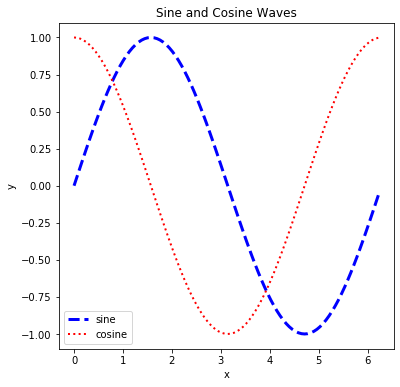

In [77]:
plt.figure(figsize = (6,6))  #these are all matplotlib.pyplot commands
plt.clf()
plt.plot(x, np.sin(x), ls='--', c='b', lw = 3, label = 'sine')
plt.plot(x, np.cos(x), ls=':' , c='r', lw = 2, label = 'cosine')

# ls is linestyle
# c is color
# lw is linewidth
# label is for the legend

plt.title("Sine and Cosine Waves")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()
# plt.savefig("asdf.pdf")

#### Errorbars

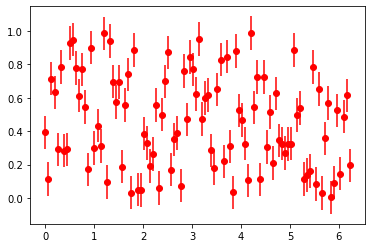

In [78]:
mydata = np.random.random(100)
errors = .1 * np.ones(100)
plt.errorbar(x, mydata, errors, fmt = 'o', color = 'red')
plt.show()

### Plotting from file

The most useful part is plotting real data from a file. Here we have a sample Cosmic Microwave Background Power Spectrum

In [79]:
#We load some data in a file
mydata = np.loadtxt('fiducial_scalCls.dat')

In [80]:
mydata

array([[2.0000e+00, 1.0773e+03, 4.5418e-02, 3.2261e+00, 1.0886e+06,
        2.9617e+04],
       [3.0000e+00, 1.0176e+03, 7.0662e-02, 3.9163e+00, 1.6769e+06,
        3.5439e+04],
       [4.0000e+00, 9.5868e+02, 7.5682e-02, 3.9417e+00, 2.1985e+06,
        3.8196e+04],
       ...,
       [6.4980e+03, 1.1937e-02, 7.3784e-05, 1.2867e-04, 1.6741e+04,
        2.1590e-01],
       [6.4990e+03, 1.1921e-02, 7.3645e-05, 1.2864e-04, 1.6737e+04,
        2.1639e-01],
       [6.5000e+03, 1.1905e-02, 7.3503e-05, 1.2860e-04, 1.6732e+04,
        2.1687e-01]])

In [81]:
mydata.shape

(6499, 6)

Row 0 is the X axis, row 1 is the Y axis.  Other rows are related things that we won't plot for now.

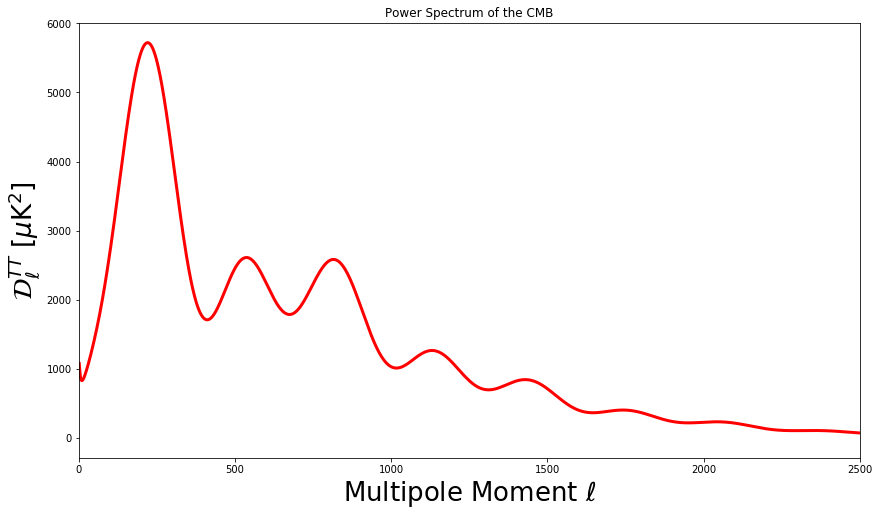

In [82]:
plt.figure(figsize=(14, 8))
plt.plot(mydata[:,0], mydata[:,1], 'r', linewidth = 3)
plt.xlim([0,2500])

plt.xlabel('Multipole Moment $\ell$',fontsize = 26)
plt.ylabel('$\mathcal{D}_\ell^{TT}$ [$\mu$K$^2$]',fontsize = 26)

plt.title("Power Spectrum of the CMB")

plt.show()

### Other types of Plots

We look at **Histograms** here, but you should look at the documentation for other types of plots. Including 2 dimensional Color maps and 3D plots. You can even make animations with Matplotlib.

In [83]:
data = np.random.standard_normal(8000) # Random data with a normal distribution

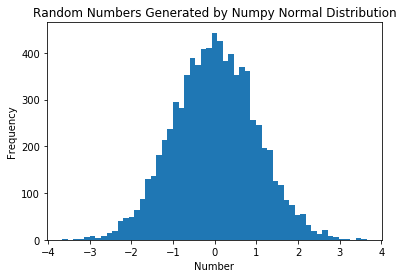

In [84]:
#Graph the data with the matplotlib histogram function using auto numbered bins
n1, bins1, patches1 = plt.hist(data, bins='auto')
plt.title('Random Numbers Generated by Numpy Normal Distribution')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

# SciPy

SciPy is a collection of software for scientific computing. It includes NumPy and matplotlib from the previous two lessons, for example.

The SciPy library also includes functions to do numerical integration, interpolation, Fourier transforms, statistics, special mathematical functions, and more.

## Curve Fitting

In [85]:
#Function in the form f(x)=a*x+b, where a, b are constant
def Linear(x, Amp, Cons):
    return Amp*x+Cons

#Function in the form f(x)=a*(x+b)^p+c where a, b, c, p are constant
def Power(x, Amp, Shift, Cons, Power):
    return Amp*(x+Shift)**Power+Cons

#Function in the form of a 3rd order Polynomial f(x)=ax^3 + bx^2 + cx + d where a, b, c, d are constants
def Polynomial(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d

In [86]:
#Function used to create noise in the data set
def Noise(data):
    return data*(0.75*np.ones(len(data))+np.random.rand(len(data))/2)

In [87]:
np.random.rand()

0.24401136701008086

In [88]:
# We next make some functions to fit.
xrange = np.linspace(-20, 20, num=1000)

linearData = Noise(Linear(xrange, 10*np.random.rand()-5, 18*np.random.rand()-9))
squareData = Noise(Power(xrange, 10*np.random.rand()-5, 18*np.random.rand()-9, 200*np.random.rand()-100, 2))

polyData = Noise(Polynomial(xrange, 10*np.random.rand()-5, 10*np.random.rand()-5, 10*np.random.rand()-5, 
                            5*np.random.rand()-2.5))


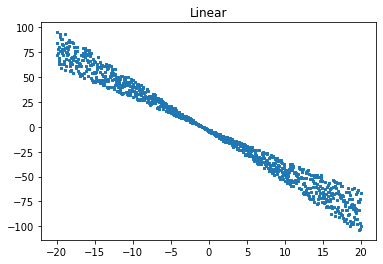

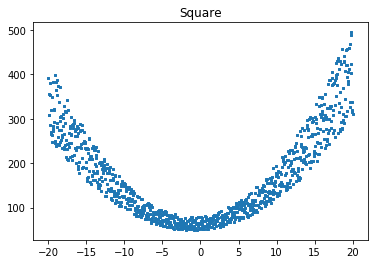

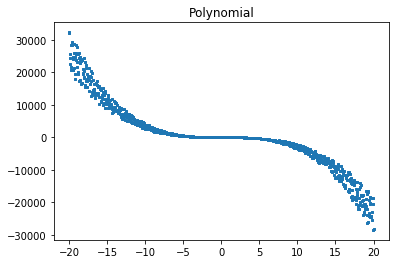

In [89]:
plt.scatter(xrange, linearData, marker=',', s=1.5)
plt.title('Linear')
plt.show()

plt.scatter(xrange, squareData, marker=',', s=1.5)
plt.title('Square')
plt.show()

plt.scatter(xrange, polyData, marker=',', s=1.5)
plt.title('Polynomial')
plt.show()

Now We can fit these data using the `curve_fit` function

In [90]:
from scipy.optimize import curve_fit

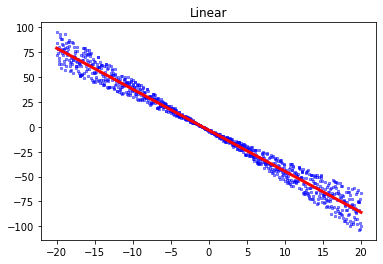

In [91]:
poptCon, pcovCon = curve_fit(Linear, xrange, linearData) # This line does the fitting

# Now We plot and compare
plt.scatter(xrange, linearData, marker=',', s=1.5, c='b', alpha=0.45)
plt.plot(xrange, Linear(xrange, *poptCon), c='r', lw=3)
plt.title('Linear')
plt.show()

In [110]:
poptCon, pcovCon = curve_fit(Power, xrange, squareData, p0=[5, 2, 100, 2], maxfev=10000) # This line does the fitting

C:\Users\henry\Anaconda3\envs\cosmopy3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

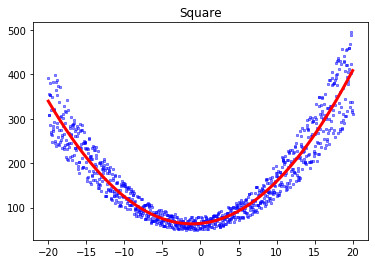

In [92]:
poly_params = np.polyfit(xrange, squareData, 2) # Instead we fit with a polynomial


# Now We plot and compare
plt.scatter(xrange, squareData, marker=',', s=1.5, c='b', alpha=0.45)
plt.plot(xrange, Polynomial(xrange, 0, *poly_params), c='r', lw=3)
plt.title('Square')
plt.show()

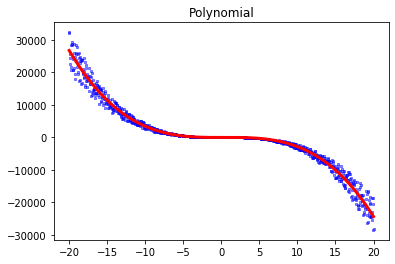

In [93]:
poly_params = np.polyfit(xrange, polyData, 3)


plt.scatter(xrange, polyData, marker=',', s=1.5, c='b', alpha=0.45)
plt.plot(xrange, Polynomial(xrange, *poly_params), c='r', lw=3)
plt.title('Polynomial')
plt.show()

## Integration


* $\int_0^5 dx (x^2 + 3)$

* We will use Gaussian quadrature  https://en.wikipedia.org/wiki/Gaussian_quadrature 

* exact answer is $5^3 / 3 + 3\times5 $

In [94]:
5.**3 / 3 + 3 * 5.

56.666666666666664

We can use SciPy to numerically integrate the function $(x^2 + 3)$.

In [95]:
from scipy import integrate

# define the function to integrate
def myf(x):
    return x**2 + 3

# pass in function, integration limits, and quality of answer
# returns answer and estimate of the error
I, err = integrate.quad(myf, 0, 5, epsabs = 1.e-14)

print(I, err)

56.66666666666666 6.29126380620922e-13


In [111]:
integrate.quad?


### Integration of a pre-sampled function

Someone hands you some pre-sampled points, and you have to calculate the area under the curve.

Recall Simpson's rule -- https://en.wikipedia.org/wiki/Gaussian_quadrature


In [96]:
N = 20

x = np.linspace(0, 2 * np.pi, N)
print(x)

[0.         0.33069396 0.66138793 0.99208189 1.32277585 1.65346982
 1.98416378 2.31485774 2.64555171 2.97624567 3.30693964 3.6376336
 3.96832756 4.29902153 4.62971549 4.96040945 5.29110342 5.62179738
 5.95249134 6.28318531]


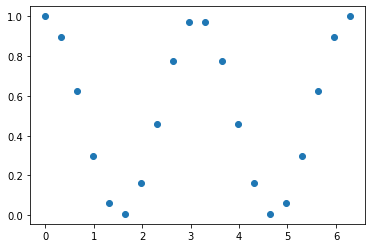

In [97]:
y = np.cos(x)**2
plt.plot(x, y, 'o')
plt.show()

In [98]:
val = integrate.simps(y,x)

In [99]:
print("value is", val, "fractional error is" , np.abs(val - np.pi) / np.pi)

value is 3.1357818235317225 fractional error is 0.0018496446544178002


# Other things you can do with Scipy:

* Solve Differential Equations (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)
* Interpolate Functions given Data (https://docs.scipy.org/doc/scipy/reference/interpolate.html)
* Linear Algebra: Matrix operations and Eigenvalue Problems (https://docs.scipy.org/doc/scipy/reference/linalg.html)
* Statistical Tools and Random Distributions (https://docs.scipy.org/doc/scipy/reference/stats.html)
* And More!

## Other Packages you should learn for Data Science, Scientific Computing and Statistical Analysis:

* Pandas - Good tool for managing and loading large data files into Python
* Sympy - Symbolic Python, for solving algebraic equations and such
* Scikit Learn - If you're into machine learning, this is the package with pre-made machine learning models to apply

All of these packages are HUGE! I don't know everything about any of these packages. As always, the documentation is your friend!

# That's all Folks! Thanks for Coming


# Questions?


Credit for some of the material covered in this file goes to the course CTA200H at the University of Toronto, taught by Prof. Norman Murray and Dr. George Stein.

Another small portion of the material is sourced from a previous workshop by Ryan Kaufmann. The rest of the material and the making of the notebook are done by me.

R. Henry Liu